# Challenge Set 4 (Linear Learning)¶

Topic: 

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Challenge 1

In [244]:
B0 = random.random()*10
B1 = random.random()*10

f = np.random.randn(1000)*1000
x = np.random.choice(np.arange(1,100000), 1000) + f
e = np.random.randn(1000)
y = B0 + B1*np.log(x) + e

In [245]:
#print(log_data)

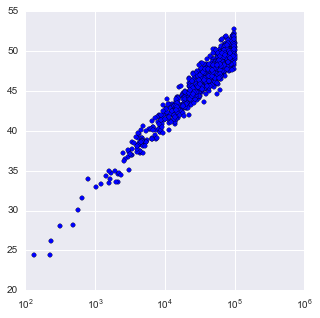

In [246]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')

plt.xscale('log')

### Quadratic fit

In [247]:
log_data = pd.DataFrame({'y':y, 'x':x, 'x2': np.power(x,2)})
log_data = log_data.dropna()
#log_data['const'] = [1 for i in range(len(x))] <---- no need for this line when working with smf.ols

In [248]:
def getQuadModel(data):
    model = smf.ols(formula='y ~ np.square(x) + x', data=data)
    results = model.fit()
    return results

In [249]:
def getPlot(results, title, ylabel='Y', xlabel='X', var=1):
    sm.graphics.plot_fit(results, var)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [250]:
quad_fit = getQuadModel(log_data)

In [251]:
quad_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2610.
Date:                Sat, 23 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                -1862.9
No. Observations:                 999   AIC:                             3732.
Df Residuals:                     996   BIC:                             3746.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       37.6694      0.147    256.187      0.000        37.381    37.958
np.square(x)  -1.86e-09   6.68e-11    -27.828      0.000     -1.99e-09 -1.73e-09
x                0.0003   6.85e-06     43.808      0.000         0.000     0.000
==============================================================================
Omnibus:                      608.737   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11808.980
Skew:                          -2.418   Prob(JB):                         0.00
Kurtosis:                      19.134   Cond. No.                     1.28e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

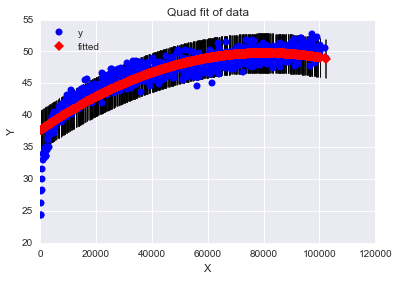

In [252]:
getPlot(quad_fit, title='Quad fit of data', var=2)

In [253]:
log_data = sm.tools.tools.add_constant(log_data)
log_data.head()

,const,x,x2,y
0,1,65858.874881,4.337391e+09,48.199852
1,1,24148.667076,5.831581e+08,44.749387
2,1,30512.732624,9.310269e+08,46.977468
3,1,19134.228965,3.661187e+08,44.020692
4,1,28002.818129,7.841578e+08,44.264743


### Log fit

In [254]:
def getLogModel(data):
    model = smf.ols(formula='y ~ np.log(x)', data=data)
    results = model.fit()
    return results

In [255]:
log_fit = getLogModel(log_data)

In [256]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Sat, 23 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                -1388.0
No. Observations:                 999   AIC:                             2780.
Df Residuals:                     997   BIC:                             2790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.9539      0.330     18.031      0.000         5.306     6.602
np.log(x)      3.8522      0.031    122.881      0.000         3.791     3.914
==============================================================================
Omnibus:                        1.638   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.522
Skew:                           0.090   Prob(JB):                        0.467
Kurtosis:                       3.067   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

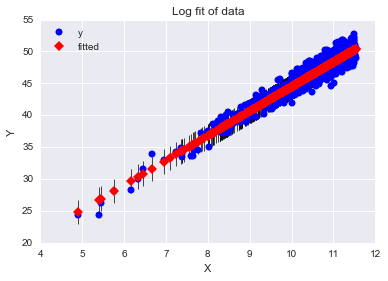

In [257]:
getPlot(log_fit, title='Log fit of data', var=1)

This seems accurate, the fit seems to match the data.

## Challenge 2

In [258]:
np.random.seed(101)

B0 = random.random()*10
B1 = random.random()*10
B2 = random.random()*10

f = np.random.randn(1000)
x = np.random.choice(np.arange(1,10), 1000)*f
e = random.random()*3*np.random.choice(range(200), 1000)
y = B0 + B1*x + B2*np.square(x) + e


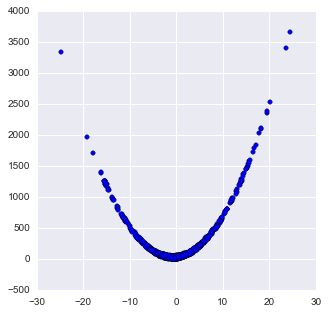

In [259]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')


In [260]:
quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})

In [261]:
quad_data = sm.add_constant(quad_data)

In [262]:
train, test = train_test_split(quad_data, test_size = 0.25)

In [263]:
quad_fit_2 = getQuadModel(train)

In [264]:
quad_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.258e+05
Date:                Sat, 23 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:55:49   Log-Likelihood:                -3152.6
No. Observations:                 750   AIC:                             6311.
Df Residuals:                     747   BIC:                             6325.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       27.9771      0.665     42.050      0.000        26.671    29.283
np.square(x)     5.7170      0.009    628.245      0.000         5.699     5.735
x                8.9452      0.105     85.304      0.000         8.739     9.151
==============================================================================
Omnibus:                      623.612   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.738
Skew:                          -0.023   Prob(JB):                     7.10e-11
Kurtosis:                       1.778   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

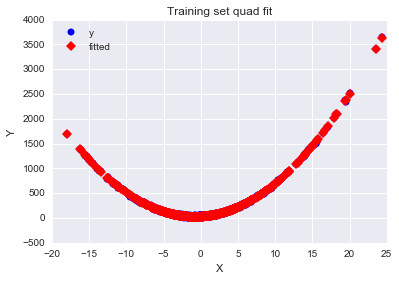

In [265]:
getPlot(quad_fit_2, title='Training set quad fit', var = 2)

In [266]:
test.head()

,const,x,x2,y
865,1,-0.230439,0.053102,23.472300
460,1,1.323162,1.750757,65.659938
727,1,-1.280880,1.640652,18.871546
293,1,4.115243,16.935222,152.677994
118,1,4.699896,22.089025,177.508783


In [267]:
def quadPlotTest(results, train, test, dpdnt='y', indp1='x', indp2='x2', const='const'):
    test = test.sort_values(by=indp1, ascending=True)
    plt.scatter(train[indp1], train[dpdnt], label='Training', color = 'red')
    plt.plot(test[indp1], results.predict(test[[const, indp2, indp1]]), color='black',linewidth=1, label='Test')
    plt.xlabel(indp1)
    plt.ylabel(dpdnt)
    plt.legend(loc='upper left')
    plt.title('Training and Testing Data')

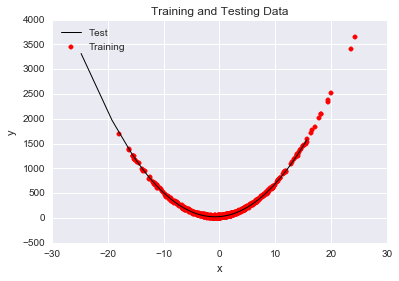

In [268]:
quadPlotTest(quad_fit_2, train, test)

### MSE Calculations

##### Training 

In [269]:
mean_squared_error(train.y, quad_fit_2.predict(train[['const', 'x', 'x2']]))

262.20160074877214

##### Testing 

In [270]:
mean_squared_error(test.y, quad_fit_2.predict(test[['const', 'x', 'x2']]))

264.51296325210359

## Challenge 3 

For the data from two (above), try polynomial fits from 0th (just constant) 

to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot

**training error**

**test error**

**R squared**

**AIC**




In [306]:
def getPolyModel(data, i):
    formula = 'y ~ 1'
    for num in range(i):
        formula += (' + np.power(x,' + str(num+1) + ')')
    
    #print(formula)
    
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    return results

In [313]:
def iterQuadData(quad_data, numIter):
    train_list = []
    test_list = []
    Rsq_list = []
    AIC_list = []
    
    np.random.seed(101)

    B0 = random.random()*10
    B1 = random.random()*10
    B2 = random.random()*10

    f = np.random.randn(1000)
    x = np.random.choice(np.arange(1,10), 1000)*f
    e = random.random()*3*np.random.choice(range(200), 1000)
    y = B0 + B1*x + B2*np.square(x) + e
    
    quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})
    quad_data = sm.add_constant(quad_data)
    train, test = train_test_split(quad_data, test_size = 0.25)
    
    for i in range(numIter):
        temp_result = getPolyModel(train, i)
        
        train_list.append(mean_squared_error(train.y, temp_result.predict(train[['const', 'x', 'x2']])))
        test_list.append(mean_squared_error(test.y, temp_result.predict(test[['const', 'x', 'x2']])))
        Rsq_list.append(temp_result.rsquared)
        AIC_list.append(temp_result.aic)
        
    c3_df = pd.DataFrame({'Train_MSE':train_list, 'Test_MSE':test_list, 'Rsquared':Rsq_list, 'AIC':AIC_list})
    return c3_df

In [314]:
c3_df = iterQuadData(quad_data, 8)

In [315]:
c3_df

,AIC,Rsquared,Test_MSE,Train_MSE
0,11710.984799,1.110223e-16,372057.942027,352957.406083
1,11667.978731,5.824309e-02,430118.426286,332400.077284
2,4198.067361,9.999556e-01,15.804942,15.666835
3,4199.397530,9.999557e-01,15.890922,15.652849
4,4201.359395,9.999557e-01,15.986462,15.652054
5,4202.482797,9.999557e-01,15.686022,15.633770
6,4204.482479,9.999557e-01,15.703008,15.633764
7,4206.256840,9.999557e-01,18.505093,15.629061


In [319]:
def plotC3(yvalue):
    c3_df.plot(c3_df.index, yvalue)
    plt.xlabel('Polynomial Order')
    plt.ylabel(yvalue)
    plt.title(yvalue + ' for each Polynomial Order')

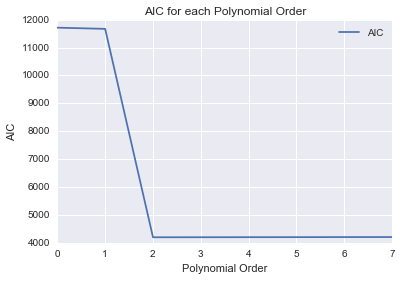

In [320]:
plotC3('AIC')

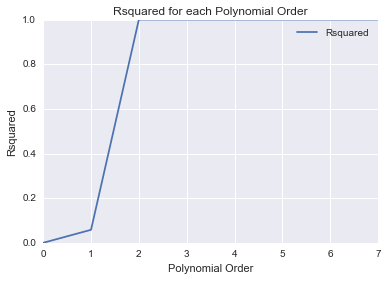

In [321]:
plotC3('Rsquared')

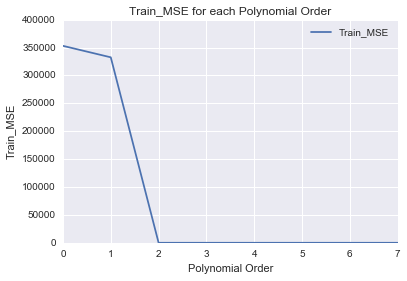

In [323]:
plotC3('Train_MSE')

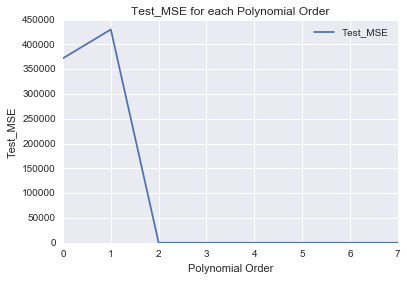

In [322]:
plotC3('Test_MSE')